In [1]:
import numpy
import matplotlib.pyplot as plt_train
import matplotlib.pyplot as plt_test
from pandas import read_csv
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
from keras.models import model_from_json
# convert an array of values into a dataset matrix

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
'''
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#09_05_2017_10KRows_modified
dataframe = read_csv('dataset/ABIL .csv')
dataframe = dataframe['4. close']
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)
'''

"\ndef create_dataset(dataset, look_back=1):\n\tdataX, dataY = [], []\n\tfor i in range(len(dataset)-look_back-1):\n\t\ta = dataset[i:(i+look_back), 0]\n\t\tdataX.append(a)\n\t\tdataY.append(dataset[i + look_back, 0])\n\treturn numpy.array(dataX), numpy.array(dataY)\n# fix random seed for reproducibility\nnumpy.random.seed(7)\n# load the dataset\n#dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)\n#09_05_2017_10KRows_modified\ndataframe = read_csv('dataset/ABIL .csv')\ndataframe = dataframe['4. close']\ndataset = dataframe.values\ndataset = dataset.astype('float32')\nprint(dataset.shape)\n"

In [20]:
dataframe = read_csv('inputMod.csv')
dataset = dataframe.values
dataset = dataset.astype('float32')
#dataset = numpy.reshape(dataset,(1948,1))
print(dataset.shape)

(18431, 100)


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
#print(dataset.shape)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)
train = numpy.reshape(train, (train.shape[0], 1, train.shape[1]))
test = numpy.reshape(test, (test.shape[0], 1, test.shape[1]))
print(train.shape)
print(test.shape)

(14744, 100)
(3687, 100)
(14744, 1, 100)
(3687, 1, 100)


In [22]:
dataframeY = read_csv('outputMod.csv')
datasetY = dataframeY.values
datasetY = datasetY.astype('float32')
datasetY = scaler.fit_transform(datasetY)
print(datasetY.shape)

(18431, 50)


In [23]:
trainY, testY = datasetY[0:train_size,:], datasetY[train_size:len(datasetY),:]
print(trainY.shape)
#trainY = numpy.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))
print(trainY.shape)
#testY = numpy.reshape(testY, (testY.shape[0], 1, testY.shape[1]))

(14744, 50)
(14744, 50)


In [24]:
model = Sequential()

In [25]:
model = Sequential()
model.add(LSTM(1000, input_shape=(1, 100)))
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(500))
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
model.add(Dense(50))
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
#model.add(Dense(20))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train, trainY, epochs=500, batch_size=100, verbose=2, validation_split=0.2)

Train on 11795 samples, validate on 2949 samples
Epoch 1/500
 - 23s - loss: 0.0180 - val_loss: 0.0150
Epoch 2/500
 - 21s - loss: 0.0121 - val_loss: 0.0143
Epoch 3/500
 - 21s - loss: 0.0115 - val_loss: 0.0140
Epoch 4/500
 - 21s - loss: 0.0111 - val_loss: 0.0137
Epoch 5/500
 - 21s - loss: 0.0110 - val_loss: 0.0137
Epoch 6/500
 - 21s - loss: 0.0109 - val_loss: 0.0136
Epoch 7/500
 - 21s - loss: 0.0109 - val_loss: 0.0137
Epoch 8/500
 - 22s - loss: 0.0108 - val_loss: 0.0136
Epoch 9/500
 - 22s - loss: 0.0107 - val_loss: 0.0136
Epoch 10/500
 - 21s - loss: 0.0107 - val_loss: 0.0134
Epoch 11/500
 - 21s - loss: 0.0107 - val_loss: 0.0135
Epoch 12/500
 - 22s - loss: 0.0106 - val_loss: 0.0135
Epoch 13/500
 - 23s - loss: 0.0106 - val_loss: 0.0134
Epoch 14/500
 - 22s - loss: 0.0105 - val_loss: 0.0134
Epoch 15/500
 - 21s - loss: 0.0105 - val_loss: 0.0133
Epoch 16/500
 - 21s - loss: 0.0104 - val_loss: 0.0133
Epoch 17/500
 - 21s - loss: 0.0104 - val_loss: 0.0131
Epoch 18/500
 - 21s - loss: 0.0103 - val_l

Epoch 151/500
 - 21s - loss: 0.0040 - val_loss: 0.0083
Epoch 152/500
 - 21s - loss: 0.0040 - val_loss: 0.0083
Epoch 153/500
 - 21s - loss: 0.0040 - val_loss: 0.0083
Epoch 154/500
 - 21s - loss: 0.0040 - val_loss: 0.0083
Epoch 155/500
 - 21s - loss: 0.0040 - val_loss: 0.0082
Epoch 156/500
 - 21s - loss: 0.0040 - val_loss: 0.0082
Epoch 157/500
 - 21s - loss: 0.0040 - val_loss: 0.0083
Epoch 158/500
 - 21s - loss: 0.0040 - val_loss: 0.0082
Epoch 159/500
 - 21s - loss: 0.0040 - val_loss: 0.0083
Epoch 160/500
 - 21s - loss: 0.0039 - val_loss: 0.0083
Epoch 161/500
 - 21s - loss: 0.0039 - val_loss: 0.0083
Epoch 162/500
 - 21s - loss: 0.0039 - val_loss: 0.0083
Epoch 163/500
 - 21s - loss: 0.0039 - val_loss: 0.0083
Epoch 164/500
 - 21s - loss: 0.0039 - val_loss: 0.0082
Epoch 165/500
 - 21s - loss: 0.0039 - val_loss: 0.0082
Epoch 166/500
 - 21s - loss: 0.0039 - val_loss: 0.0083
Epoch 167/500
 - 21s - loss: 0.0039 - val_loss: 0.0083
Epoch 168/500
 - 21s - loss: 0.0039 - val_loss: 0.0082
Epoch 169/

Epoch 300/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 301/500
 - 21s - loss: 0.0033 - val_loss: 0.0084
Epoch 302/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 303/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 304/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 305/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 306/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 307/500
 - 21s - loss: 0.0033 - val_loss: 0.0084
Epoch 308/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 309/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 310/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 311/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 312/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 313/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 314/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 315/500
 - 21s - loss: 0.0033 - val_loss: 0.0084
Epoch 316/500
 - 21s - loss: 0.0033 - val_loss: 0.0084
Epoch 317/500
 - 21s - loss: 0.0033 - val_loss: 0.0083
Epoch 318/

Epoch 449/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 450/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 451/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 452/500
 - 21s - loss: 0.0030 - val_loss: 0.0084
Epoch 453/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 454/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 455/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 456/500
 - 21s - loss: 0.0030 - val_loss: 0.0084
Epoch 457/500
 - 21s - loss: 0.0030 - val_loss: 0.0084
Epoch 458/500
 - 21s - loss: 0.0030 - val_loss: 0.0084
Epoch 459/500
 - 21s - loss: 0.0030 - val_loss: 0.0084
Epoch 460/500
 - 21s - loss: 0.0030 - val_loss: 0.0084
Epoch 461/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 462/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 463/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 464/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 465/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 466/500
 - 21s - loss: 0.0030 - val_loss: 0.0085
Epoch 467/

In [26]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("trainedModel.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
#Loading the Trained Model while Testing

In [28]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [29]:
trainPredict = loaded_model.predict(train)
#model1= Sequential()
#model1=model

In [10]:
#print(test)

In [30]:
#keras.layers.Dropout(0.2, noise_shape=None, seed=None)
#model.add(Dense(50))
model=loaded_model
model.add(Dropout(0.2, noise_shape=None, seed=None))
#model.add(Dense(20))
testPredict = model.predict(test)
#print(trainPredict)
#print(testPredict)
# invert predictions
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))

In [31]:
print(scaler.inverse_transform(trainPredict))

[[70.904884 70.82195  71.10997  ... 71.234695 71.19815  71.36148 ]
 [70.904884 70.82195  71.10997  ... 71.234695 71.19815  71.36148 ]
 [70.904884 70.82195  71.10997  ... 71.234695 71.19815  71.36148 ]
 ...
 [70.90017  70.81682  71.132965 ... 71.20672  71.19716  71.37094 ]
 [70.87823  70.80385  71.09854  ... 71.2569   71.19244  71.36988 ]
 [70.91698  70.822395 71.09089  ... 71.219406 71.21052  71.33719 ]]


In [32]:
print(scaler.inverse_transform(trainY))

[[71.895    71.93     71.9      ... 72.3      72.275    72.27    ]
 [71.895    71.93     71.9      ... 72.3      72.275    72.27    ]
 [71.895    71.93     71.9      ... 72.3      72.275    72.27    ]
 ...
 [71.68628  71.62465  71.35155  ... 72.08048  72.479935 72.193855]
 [72.067    71.74836  71.41369  ... 71.89405  72.13408  72.69304 ]
 [71.69563  71.94076  72.14472  ... 72.02997  72.32758  72.389725]]


In [33]:
temptrainPredict = scaler.inverse_transform(trainPredict)
temptrainY = scaler.inverse_transform(trainY)
temptestPredict = scaler.inverse_transform(testPredict)
temptestY = scaler.inverse_transform(testY)

In [34]:
#print(testPredict[1].shape)
trainScore = math.sqrt(mean_squared_error(temptrainY[20], temptrainPredict[20]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(temptestY[20], temptestPredict[20]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.98 RMSE
Test Score: 0.99 RMSE


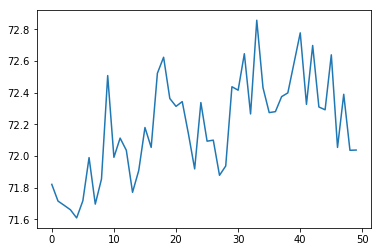

[71.820724 71.71519  71.6881   71.660194 71.60873  71.71672  71.990005
 71.696    71.85446  72.50856  71.99175  72.113266 72.03628  71.77063
 71.90894  72.180084 72.05454  72.52313  72.62434  72.36362  72.313896
 72.34386  72.139435 71.918655 72.33792  72.09378  72.10032  71.87799
 71.936874 72.437996 72.41608  72.646645 72.26595  72.85828  72.43224
 72.27438  72.28049  72.37538  72.39901  72.588806 72.7785   72.326584
 72.6988   72.31     72.29224  72.63969  72.054405 72.390205 72.036224
 72.0377  ]


In [35]:
plt_test.plot(temptestY[20])
plt_test.show()
print(temptestY[20])

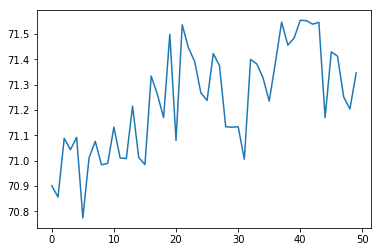

[70.90145  70.856705 71.08866  71.04368  71.09206  70.77426  71.011925
 71.07655  70.98417  70.98947  71.13307  71.011086 71.00878  71.21581
 71.01294  70.98469  71.33435  71.26209  71.17055  71.49948  71.08043
 71.53702  71.44615  71.39231  71.26789  71.23841  71.42333  71.3756
 71.13441  71.13243  71.13468  71.00595  71.40046  71.38233  71.32807
 71.23561  71.38769  71.54778  71.4568   71.48406  71.554924 71.55323
 71.53943  71.5468   71.1708   71.43     71.41315  71.25142  71.20457
 71.34681 ]


In [36]:
plt_test.plot(temptestPredict[20])
plt_test.show()
print(temptestPredict[20])
a=temptestPredict[20]

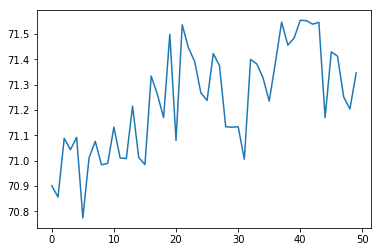

[70.90145  70.856705 71.08866  71.04368  71.09206  70.77426  71.011925
 71.07655  70.98417  70.98947  71.13307  71.011086 71.00878  71.21581
 71.01294  70.98469  71.33435  71.26209  71.17055  71.49948  71.08043
 71.53702  71.44615  71.39231  71.26789  71.23841  71.42333  71.3756
 71.13441  71.13243  71.13468  71.00595  71.40046  71.38233  71.32807
 71.23561  71.38769  71.54778  71.4568   71.48406  71.554924 71.55323
 71.53943  71.5468   71.1708   71.43     71.41315  71.25142  71.20457
 71.34681 ]


In [37]:
plt_test.plot(temptestPredict[20])
plt_test.show()
print(temptestPredict[20])
b=temptestPredict[20]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


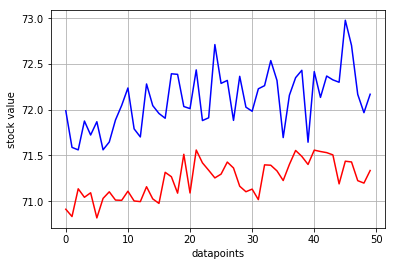

In [38]:
import matplotlib.pyplot as plt
axes = plt.gca()
#axes.set_xlim([0,50])
#axes.set_ylim([0,10])
#plt.text(10,5.8,r'Red = Predictions, Blue = Actual Data')
plt.xlabel('datapoints')
plt.ylabel('stock value')
plt.plot(temptestPredict[100],'r')
plt.plot(temptestY[10],'b')
plt_test.grid('True')
plt_test.show()
#plt.savefig('S&P5001.png')